In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Info about the data

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

Some definition about the columns: 

- clientnumer:              Client number. Unique identifier for the customer holding the account
- Attrition_Flag:           Internal event (customer activity) variable - if the account is closed then 1 else 0
- Customer_Age:             Demographic variable - Customer's Age in Years
- Gender:                   Demographic variable - M=Male, F=Female
- Dependent_count:          Demographic variable - Number of dependents
- Education_Level:          Demographic variable - Educational Qualification of the account holder (example: high school, 
                            college graduate, etc.)
- Marital_Status:           Demographic variable - Married, Single, Divorced, Unknown
- Income_Category:          Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - 
                            $80K, $80K-$120K, >)
- Card_Category:            Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book:           Period of relationship with bank
- Total_Relationship_Count: Number of products the costumer has
- Months_Inactive_12_mon:   quantity of months inactivity in last 12 months
- Contacts_Count_12_mon:    quantity of months of contacts in the last 12 months
- Credit_Limit:             credit limit on the card
- Total_Revolving_Bal:      total balans on credit card (The balance that carries over from one month to the next is the 
                            revolving balance on that loan)
- Avg_Open_To_Buy:          open to buy credit line (average)
- Total_Amt_Chng_Q4_Q1:     changes in transaction  Q4 over Q1
- Total_Trans_Amt:          amount of transactions for last 12 months
- Total_Trans_Ct:           count of transactions for last 12 months
- Total_Ct_Chng_Q4_Q1:      change in transaction count from Q4 over Q1
- Avg_Utilization_Ratio:    average card utilization ration


# Exploring the data

I first want to explore the data: are there already some relationships that can be made? What does the different parameters tell me?

In [4]:
data = pd.read_csv('BankChurners.csv')

data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

Does the client appears only one time?

In [5]:
duplicates_clientnumber = data[data.duplicated(subset=['CLIENTNUM'])]
print(duplicates_clientnumber)


Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2]
Index: []

[0 rows x 23 columns]


delete 2 last columns:
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [6]:
data = data.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
          "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])
data = data.drop(columns=['CLIENTNUM'])
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

Looking for graphical values

In [7]:
data.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

Are there missing values?

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

looking at the valuesfor each column:

In [9]:
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()


Attrition_Flag
['Existing Customer' 'Attrited Customer']

Customer_Age
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]

Gender
['M' 'F']

Dependent_count
[3 5 4 2 0 1]

Education_Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

Marital_Status
['Married' 'Single' 'Unknown' 'Divorced']

Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']

Months_on_book
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]

Total_Relationship_Count
[5 6 4 3 2 1]

Months_Inactive_12_mon
[1 4 2 3 6 0 5]

Contacts_Count_12_mon
[3 2 0 1 4 5 6]

Credit_Limit
[12691.  8256.  3418. ...  5409.  5281. 10388.]

Total_Revolving_Bal
[ 777  864    0 ...  534  476 2241]

Avg_Open_To_Buy
[11914.  7392.  3418.

I have 2 columns (Marital_Status, Income_Category) with value 'Unknown': what does it mean? how much is it? What is the impact of it? How do I deal with this?

In [10]:
unknown_martial_status = (data['Marital_Status'] == 'Unknown').sum()
unknown_income_category = (data['Income_Category'] == 'Unknown').sum()

print('count unknown data for Martial_Status', unknown_martial_status)
print('count unknown data for Income_Category', unknown_income_category)
print('total amount data', data['Customer_Age'].count() )

count unknown data for Martial_Status 749
count unknown data for Income_Category 1112
total amount data 10127


In [11]:
#see if the data of unknwo is in the same rows of each other?
both_unknown = (unknown_martial_status & unknown_income_category).sum()

print('both_unknown', both_unknown)

both_unknown 72


The question is now, do we drop the rows with the unknown?
For the Martial_Status, it can be usefull as a seperate class.
For the Income_Category, I can maybey leave it out.

To train  and test a model: keep it numeric values

# Conclusion on the data: 
- no missing values EXCEPT: 'Unknown' values in columns Marital_Status and Income_Category: how to deal with this?
- I dropped CLIENTNUM column: no need the have those, index is more usefull
- dropped last 2 columns (from Kaggle:this is the column with the answer):
            Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
            Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2



# Vizuals

I first want to see the distribution of each data (numerical and categorical)

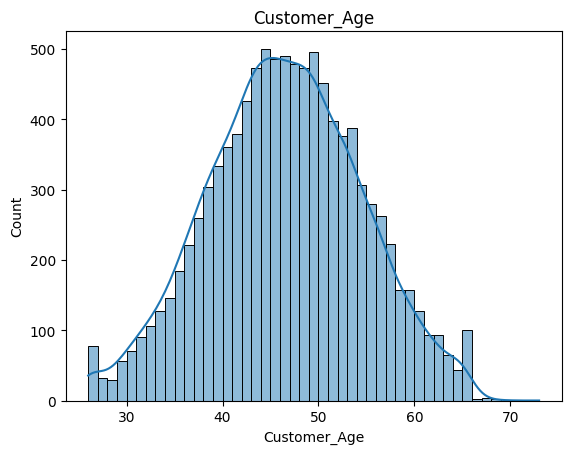

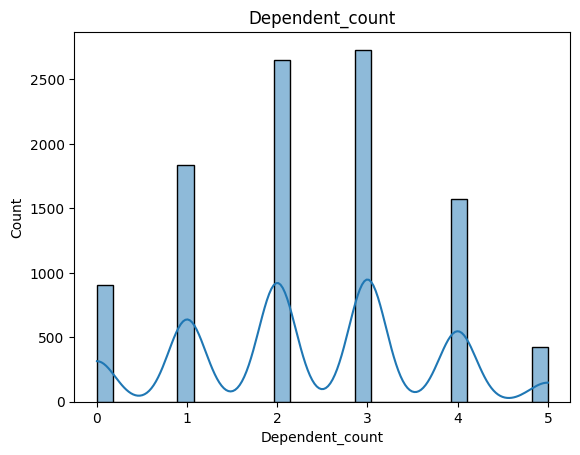

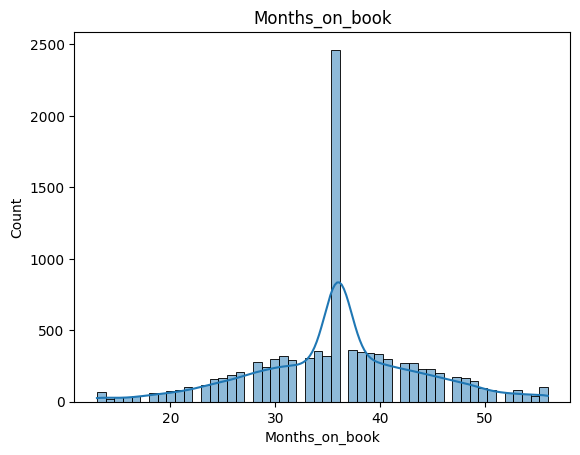

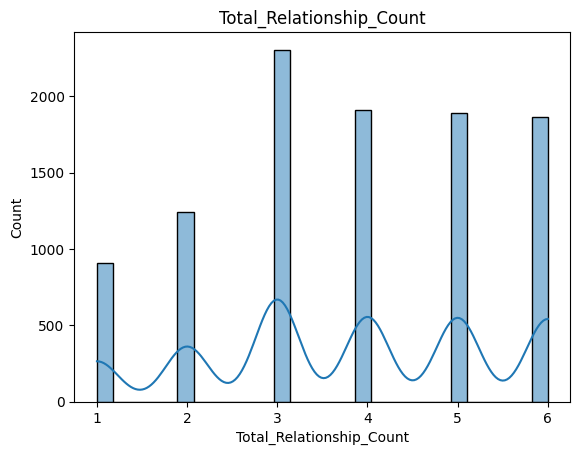

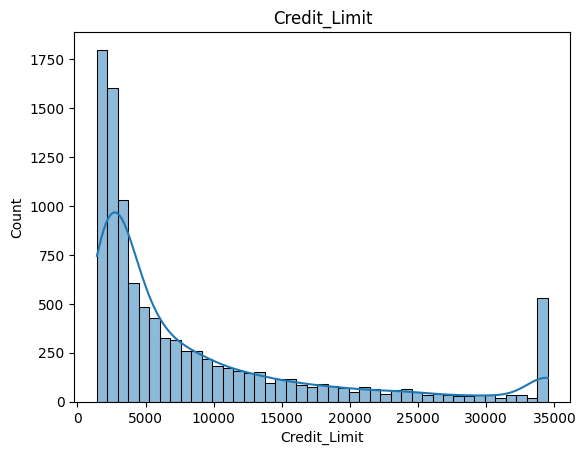

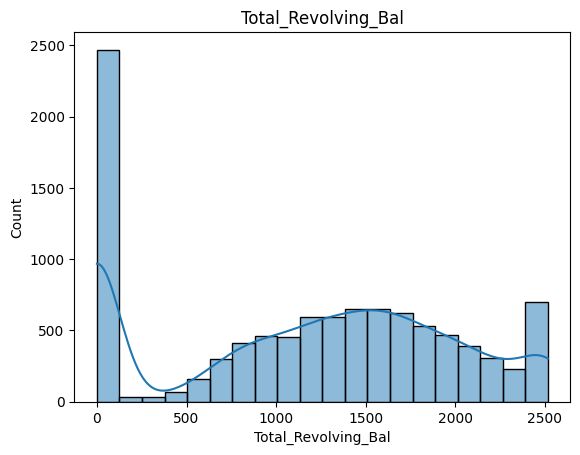

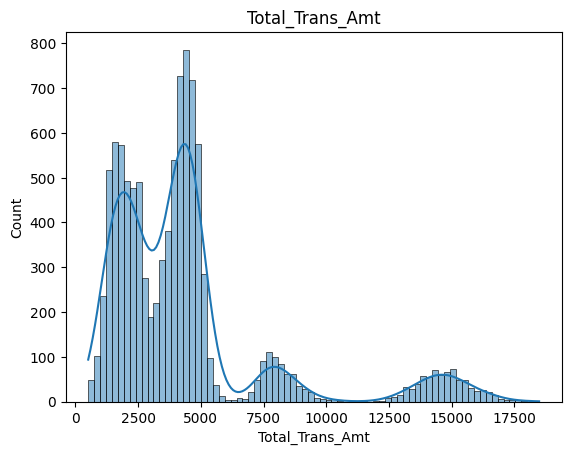

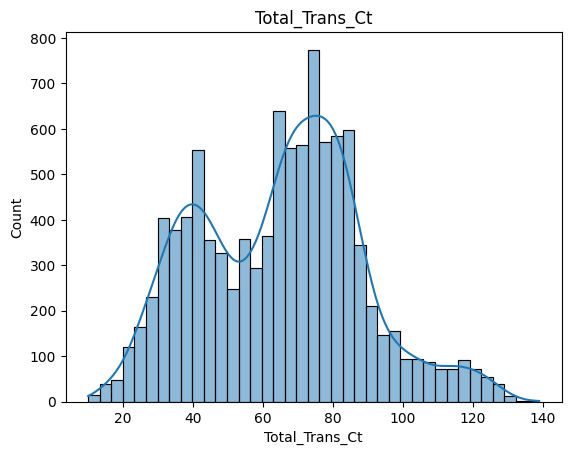

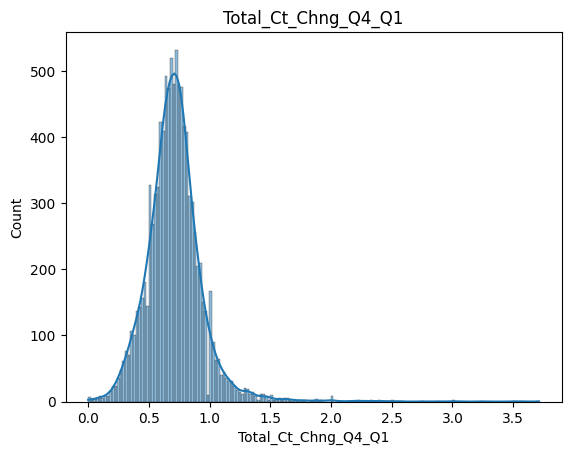

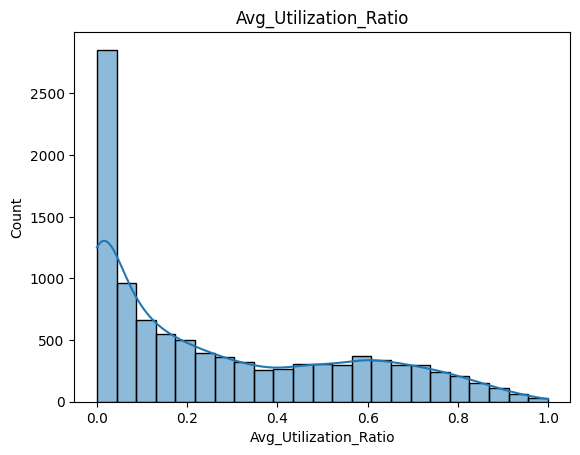

In [12]:
# numerical values vs non-numerical:
num_cols = data.select_dtypes(include=['int64' ,'float']).columns
for col in num_cols:
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.show()


# Conclusion on shapes of distribution:
##### symmetric:
- costumer_age
- Dependent_count
- Months_on_book : one big peak around 35 months
- Contacts_Count_12_mon: highest on 2 and 3 contacts
- Total_Amt_Chng_Q4_Q1: a bit right skewed, but not relevant
- Total_Ct_Chng_Q4_Q1: a bit right skewed, but not relevant

##### left skewed (highest value on the right):
- none

##### right skewed (highest value on the left):
- Months_inactive_12_mon
- Credit_limite
- Avg_Open_To_Buy
- Avg_Utilization_Ration: very high peak at 0.0!



##### Bimodal destributions (peeks on the left and right, symetric):
- Total_Trans_Amt: 4 symmetric peaks! classification? 0-2750? , ?2750-6700 , 6700-10000 , 12500-17500
- Total_Trans_Count: 2 sym peaks

##### Uniform distribution (overall same results):
- none

##### ??? 
- Total_Relationship_Count
- Total_Revolving_Bal


# OBSERVATIONS
- imbalansed data for Existent and Atritted Costumers : Existing Customer    8500
                                                        Attrited Customer    1627
            --> how to handle this for training model in classification?
            1. only take 1627 samples (random) from Existing Customer and add it to the Attrited Customer: not best approach, bcs trowing away to much data
            2. oversampling minory class = multiply Attrited by X to have 8500 samples
            3. OR oversampling minory class with technique SMOTE (=synthetic minority oversampling technique)
            4. Ensemble Methode: split Existing into 5 samples of each 1627, and train 5 models, then use Majority Vote (ex. Random Forest)
            5. Focal loss : penalizing majority sample when losses, wheight is given to minority class (article on medium: https://medium.com/analytics-vidhya/how-focal-loss-fixes-the-class-imbalance-problem-in-object-detection-3d2e1c4da8d7#:~:text=Focal%20loss%20is%20very%20useful,is%20simple%20and%20highly%20effective)



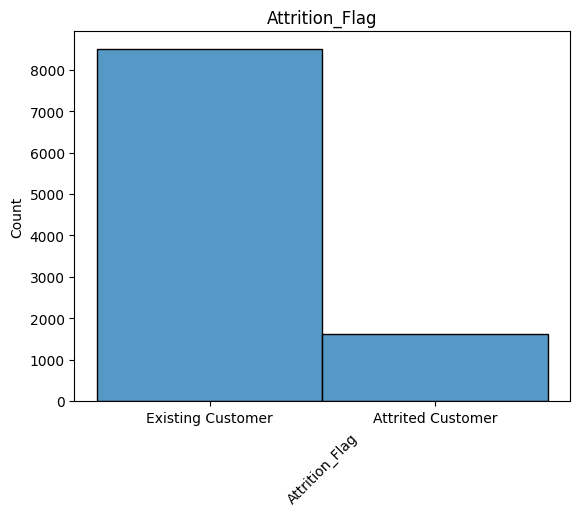

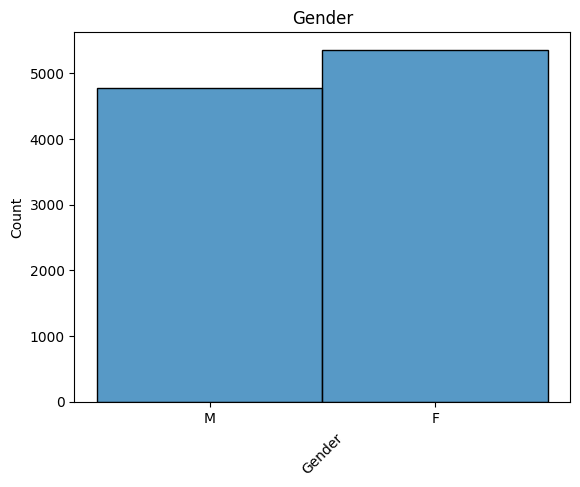

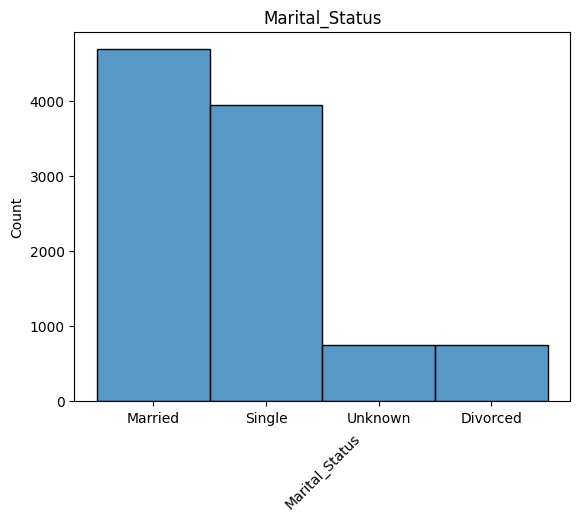

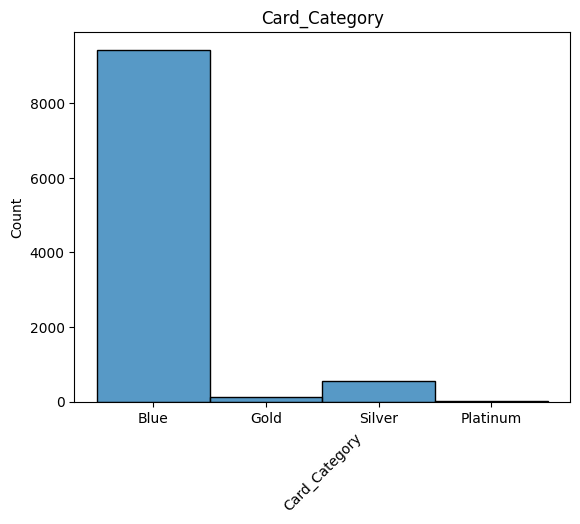

In [13]:
#non-numerical values
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    sns.histplot(data[col])
    plt.xlabel(col, rotation=45)
    plt.title(col)
    plt.show()

In [14]:
data['Attrition_Flag'].value_counts()


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

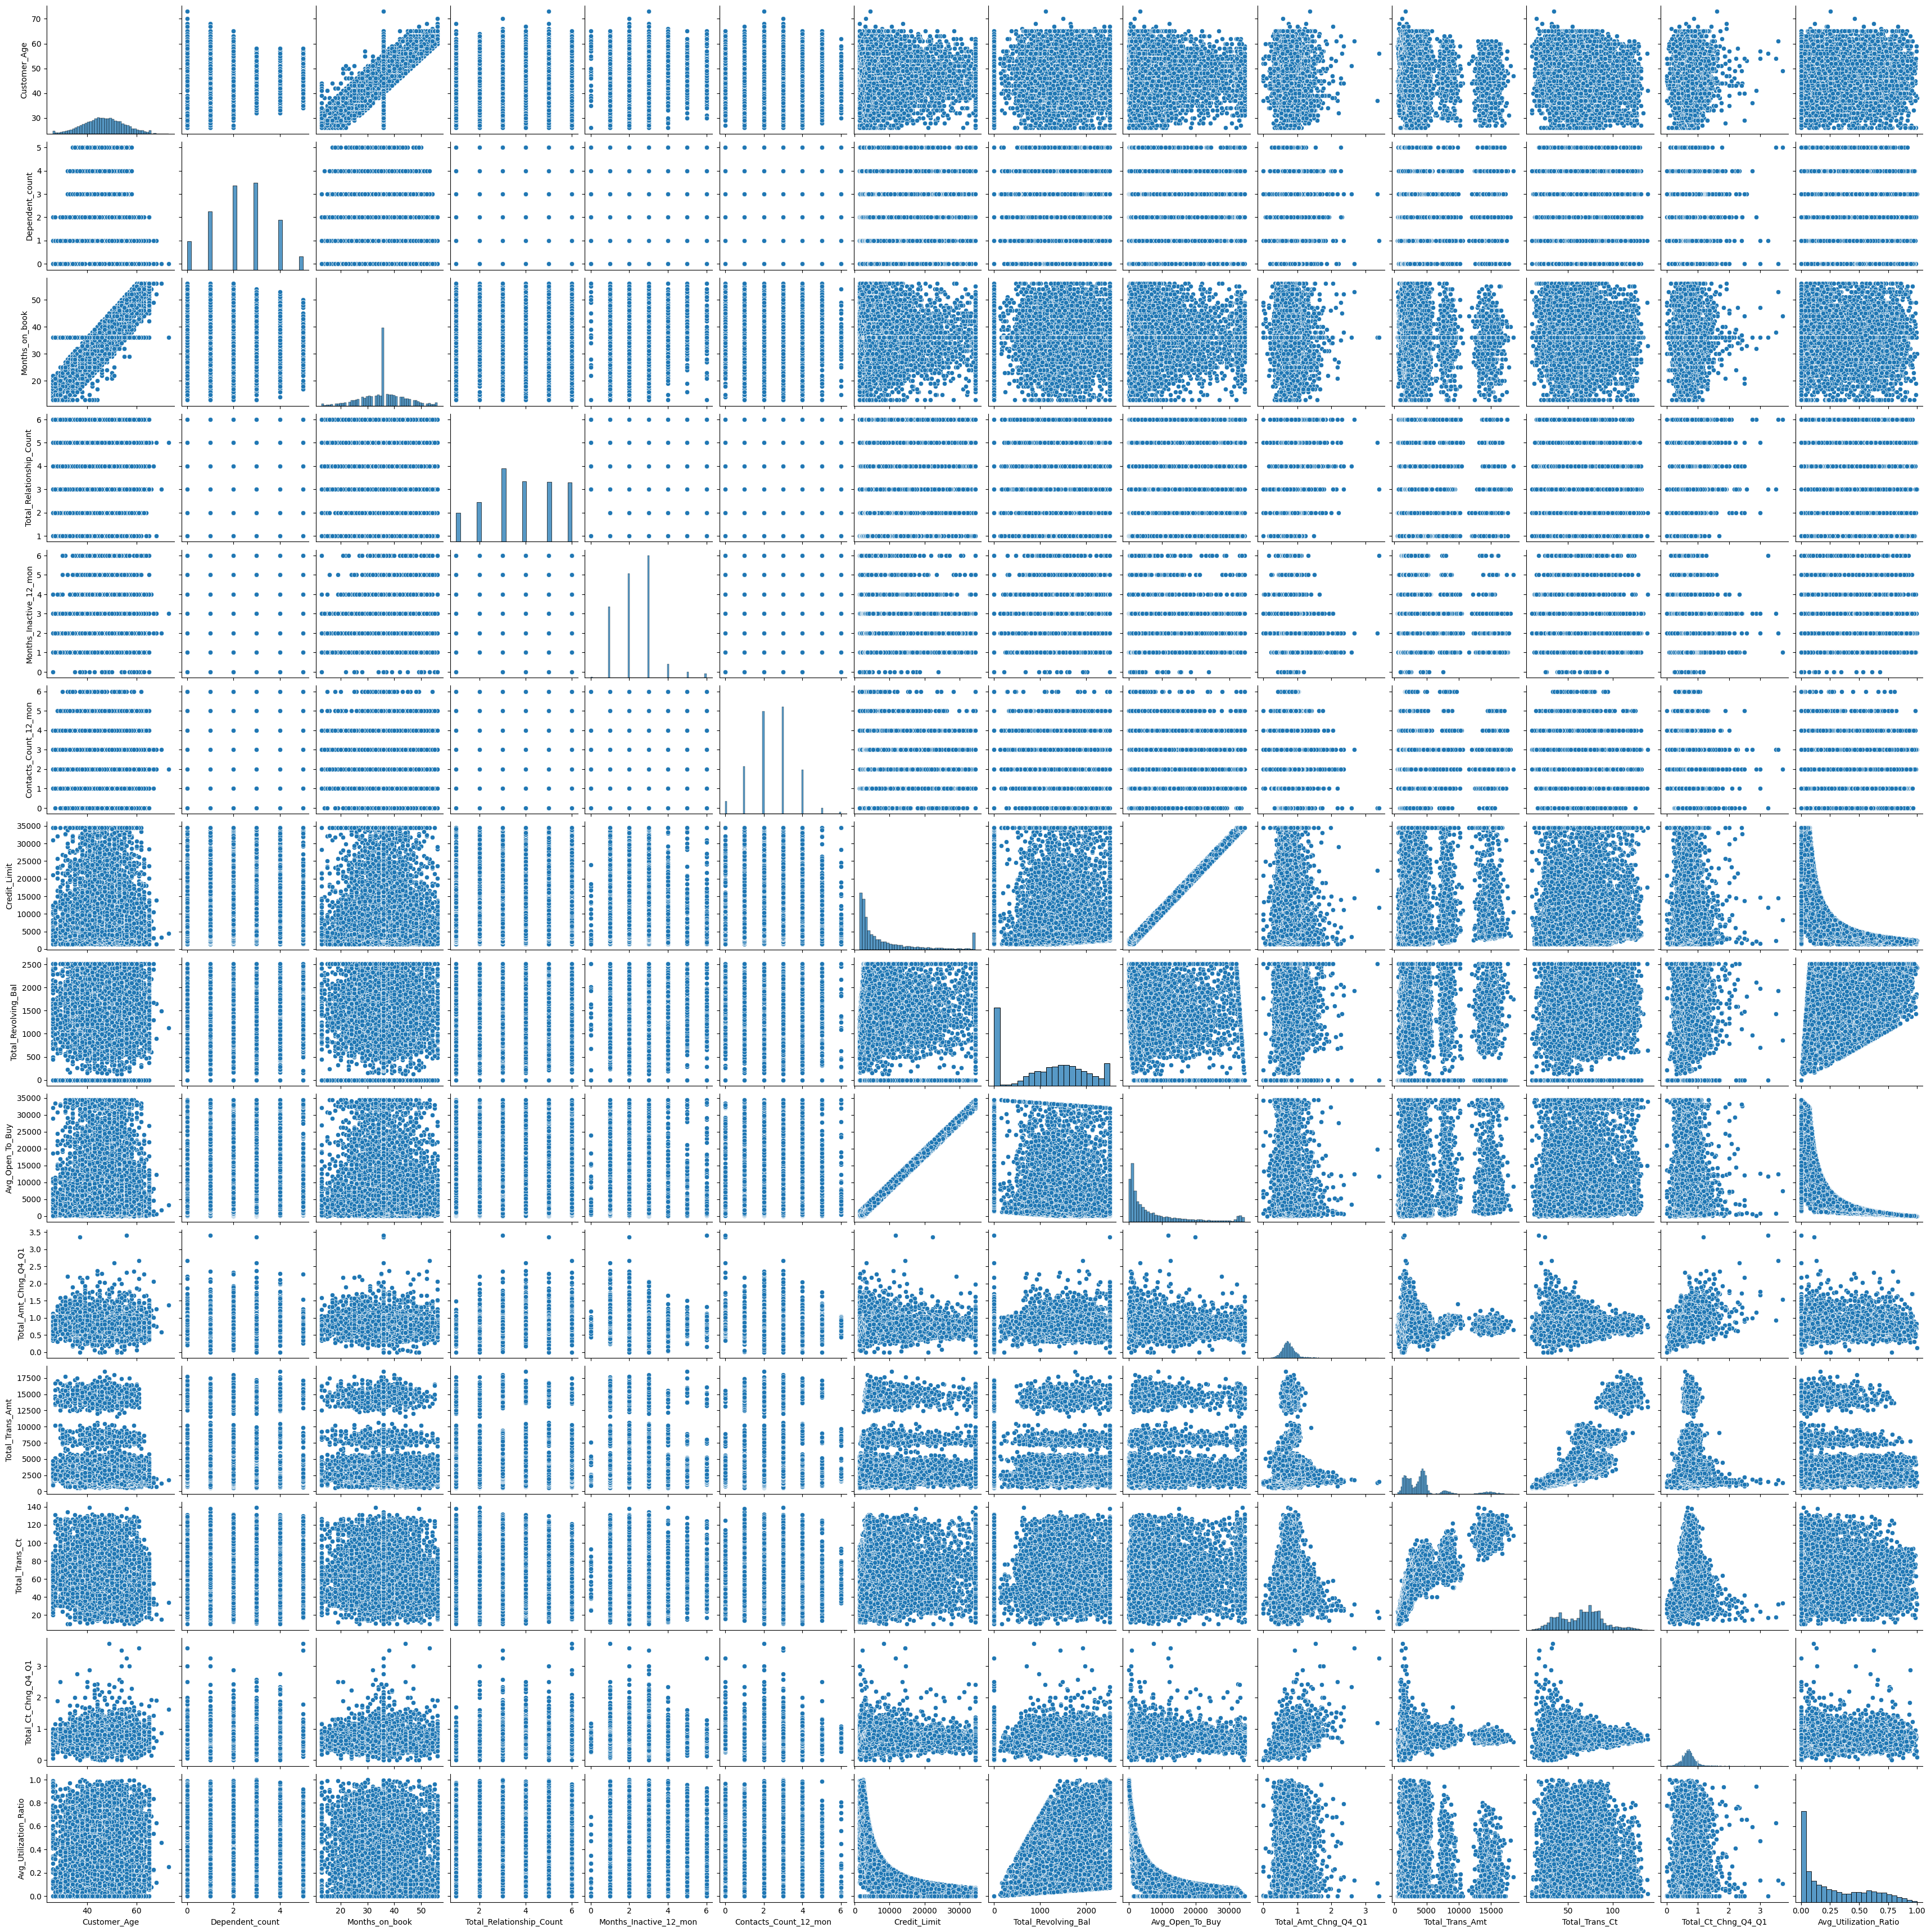

In [15]:
sns.pairplot(data)
plt.show()

In [ ]:
correlation = data.select_dtypes(include=['int64' ,'float'])

plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap correlation numerical values')


# Churners vs Non-Churners

In [1]:
import 
#changing categorical values into numerical for visualization
label_encoder = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

correlation = data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation, cmap='coolwarm',linewidths=0.5, annot=True)
plt.title('heatmap')
plt.show()

NameError: name 'LabelEncoder' is not defined

In [ ]:
data.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               1            45       1                3                3   
1               1            49       0                5                2   
2               1            51       1                3                2   
3               1            40       0                4                3   
4               1            40       1                3                5   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               1                2              0              39   
1               2                4              0              44   
2               1                3              0              36   
3               3                4              0              34   
4               1                2              0              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

## Conclusion: 
### POS
- AVG_open_to_buy vs Credit_limit
- months_on_books vs Customer_Age
- Total_trans_AMT vs Total_trans_Ct
- AVG_utilization_ration vs Total_Revolving_Bal
- Credit_limit vs card_catergory
- Avg_open_to_buy vs card_category
### NEG
- Attrition_Flag vs Contact_Count_12_mon
- Atrition_Flag vs Months_inactive_12_mon
### POS
- Attrition_Flag vs Total_Trans_Ct
- Attrition_Flag vs Total_Ct_Chng_Q4_Q1

# Cleaning and Prep the data

# Testing which model is best

##### Test 1: with Pipeline --> not working yet

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


#load data and preprocessing
data = pd.read_csv('BankChurners.csv')
X = data.drop(columns=['Attrition_Flag'])
y = data['Attrition_Flag']

#preprocessing the data
class Preprocessor():
    def __init__(self):
        pass

    def drop_columns(self, data):
        '''
        columns like Clientnumber is never used in Machin Learning, so we drop them to facilitate the data
        '''
        columns_to_drop = ["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
          "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
          'CLIENTNUM']
        data.drop(columns=columns_to_drop, inplace=True)
        return data
        
    def handle_unknown(self, data):
        '''
        How do we handle data with 'Unknown' as a value?
        Here I decided to ignore it for 
        '''
        pass
        
    def handle_categorical_values(self, data):
        '''
        Machine Learning models can't handle categorical values, so we need to encode then 
        (change into numerical data), I do thsi with the LabelEncoder from sklearn
        '''
        label_encoder = LabelEncoder()

        for col in data.columns:
            if data[col] == 'object':
                data[col] = label_encoder.fit_transform(data[col])
        return data

    def apply_smote():
        '''
        Since the data is out of balance (8500 Existing Customer over 1627 Attrited Customer) I decided to use 
        the SMOTE technique (see notebook for more info)
        '''
        smote = SMOTE()
        data = smote.fit(data)
        return data

# pipeline
preprocessor = Preprocessor()
pipeline = Pipeline([('preprocessor', preprocessor)])

#preprocessing data
X_preprocessed = pipeline.named_steps['preprocessor'].drop_columns(X)
X_preprocessed = pipeline.named_steps['preprocessor'].handle_unknown(X_preprocessed)
X_preprocessed = pipeline.named_steps['preprocessor'].handle_categorical_values(X_preprocessed)

#split data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


#i want to compaire different models to each other, so i create a function to evaluate the performance of each model
def evaluate_models(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_lable='blabla')
    recall = recall_score(y_test, y_pred, pos_lable='blabla')
    f1 = f1_score(y_test, y_pred, pos_lable='blabla')
    return accuracy, precision, recall, f1


#models I want to test
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

#models I want to test
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

#evaluation models
models = {'Random Forest':rf_model, 'KNN Model': knn_model, 'Logistric Regression': lr_model}
results = {}
for name_model, model in models.items():
    accuracy, precision, recall, f1 = evaluate_models(model, X_train, X_test, y_train, y_test)
    results[name_model] = {'accuracy':accuracy, 'precision': precision, 'recall': recall, 'f1':f1}

for name, scores in results.items():
    print(f"Model: {name}")
    for type,score in scores.items():
        print(f"{type} : {score}")
    print()


In [ ]:

#define pipeline
# numerical_cols = X_train.select_dtypes(include=['object']).columns

# categorial_cols = X_train.select_dtypes(include=['int','foat']).columns

# cat_pipeline = Pipeline([('label_encoder', LabelEncoder())])

# preprocessor = ColumnTransformer([
#     ('numerical', numerical_cols),
#     ('categorical', categorial_cols, cat_pipeline)
# ])







# #preprocessing the data
# class Preprocessor():
#     def __init__(self, data):
#         self.data = data

#     def drop_columns(self, data):
#         '''
#         columns like Clientnumber is never used in Machin Learning, so we drop them to facilitate the data
#         '''
#         columns_to_drop = ["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
#           "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
#           'CLIENTNUM']
#         data.drop(columns=columns_to_drop, inplace=True)
#         return data
        
#     def handle_unknown(self, data):
#         '''
#         How do we handle data with 'Unknown' as a value?
#         Here I decided to ignore it for 
#         '''
#         pass
        
#     def handle_categorical_values(self, data):
#         '''
#         Machine Learning models can't handle categorical values, so we need to encode then 
#         (change into numerical data), I do thsi with the LabelEncoder from sklearn
#         '''
#         label_encoder = LabelEncoder()

#         for col in data.columns:
#             if data[col] == 'object':
#                 data[col] = label_encoder.fit_transform(data[col])
#         return data
    
#     def apply_smote():
#         '''
#         Since the data is out of balance (8500 Existing Customer over 1627 Attrited Customer) I decided to use 
#         the SMOTE technique (see notebook for more info)
#         '''
#         smote = SMOTE()
#         data = smote.fit(data)
#         return data
        
# # pipeline
# preprocessor = Preprocessor(data)
# pipeline = Pipeline([('preprocessor', preprocessor)])

# #preprocessing data
# X_preprocessed = pipeline.named_steps['preprocessor'].drop_columns(X)
# X_preprocessed = pipeline.named_steps['preprocessor'].handle_unknown(X_preprocessed)
# #X_preprocessed = pipeline.named_steps['preprocessor'].handle_categorical_values(X_preprocessed)


# #split data
# X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


# #i want to compaire different models to each other, so i create a function to evaluate the performance of each model
# def evaluate_models(model, X_train, X_test, y_train, y_test):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, pos_lable='blabla')
#     recall = recall_score(y_test, y_pred, pos_lable='blabla')
#     f1 = f1_score(y_test, y_pred, pos_lable='blabla')
#     return accuracy, precision, recall, f1

# #models I want to test
# rf_model = RandomForestClassifier(random_state=42)
# knn_model = KNeighborsClassifier(random_state=42)
# lr_model = LogisticRegression(random_state=42)

# #evaluation models
# models = {'Random Forest':rf_model, 'KNN Model': knn_model, 'Logistric Regression': lr_model}
# results = {}
# for name_model, model in models.items():
#     accuracy, precision, recall, f1 = evaluate_models(model, X_train, X_test, y_train, y_test)
#     results[name_model] = {'accuracy':accuracy, 'precision': precision, 'recall': recall, 'f1':f1}

# for name, scores in results.items():
#     print(f"Model: {name}")
#     for type,score in scores.items():
#         print(f"{type} : {score}")
#     print()

 

##### Test 2:without pipeline

Conclusion: 
the best result base on accuracy, precision, recall and f1 is the Gradient Boosting model. 
Highest scores across all evaluation metrics.

In [ ]:
#import linrary for preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

#import library for models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.model_selection import cross_val_score


#load data and preprocessing
data = pd.read_csv('/Users/caro/Documents/Projects/Churn_prediction/data/BankChurners.csv')


#preprocessing the data
class PreprocessingData:
    def __init__(self, data):
        self.data = data

    def drop_columns(self):
        '''
        columns like Clientnumber is never used in Machin Learning, so we drop them to facilitate the data
        '''
        columns_to_drop = ["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
          "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
          'CLIENTNUM']
        self.data.drop(columns=columns_to_drop, inplace=True)
        return self.data
        
        
    def handle_unknown(self):
        '''
        How do we handle data with 'Unknown' as a value?
        Here I decided to ignore it for 
        '''

        pass
        
    def handle_categorical_values(self):
        '''
        Machine Learning models can't handle categorical values, so we need to encode then 
        (change into numerical data), I do thsi with the LabelEncoder from sklearn
        '''
        label_encoder = LabelEncoder()

        for col in self.data.columns:
            if self.data[col].dtype == 'object':
                self.data[col] = label_encoder.fit_transform(self.data[col])
        return self.data


prep_data = PreprocessingData(data)
prep_data.drop_columns()
prep_data.handle_categorical_values()


#split data
X = prep_data.data.drop(columns=['Attrition_Flag'])
y = prep_data.data['Attrition_Flag']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


#i want to compaire different models to each other, so i create a function to evaluate the performance of each model
def evaluate_models(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy , precision, recall, f1

#models I want to test
rf_model = RandomForestClassifier(random_state=42)                  #RandomForest model
knn_model = KNeighborsClassifier(n_neighbors=5)                     #LogisticRegression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)       #LogisticRegression model
dt_model = DecisionTreeClassifier(random_state=42)                  #DecisionTree model
gmb_model = XGBClassifier(random_state=42)                          #Gradient Boosting ML model
nn_model = MLPClassifier(random_state=42)                           #Neural Network ML model
naiv_model = GaussianNB()                                           #Naive Bayes model
svc_model = SVC(random_state=42)                                    #Support Vector Classifier model

#evaluation models
models = {'Random Forest':rf_model, 'KNN Model': knn_model, 'Logistric Regression': lr_model, 
          'Decision Tree': dt_model, 'Gradient Boosting':gmb_model, 'Neural Network':nn_model, 
          'Naive Bayes':naiv_model, 'Support Vector Classifier': svc_model}
results = {}
for name_model, model in models.items():
    accuracy, precision, recall, f1 = evaluate_models(model, X_train, X_test, y_train, y_test)
    results[name_model] = {'accuracy':accuracy, 'precision': precision, 'recall': recall,'f1':f1}

for name, scores in results.items():
    print(f"Model: {name}")
    for type,score in scores.items():
        print(f"{type} : {score}")
    print()




results without pipeline and before SMOTE:
1. Model: Random Forest
accuracy : 0.9585389930898321
precision : 0.9648819804260219
recall : 0.9864626250735727
f1 : 0.9755529685681025

2. Model: KNN Model
accuracy : 0.8899308983218164
precision : 0.9160090191657272
recall : 0.9564449676280165
f1 : 0.9357903829542182

3. Model: Logistric Regression
accuracy : 0.8914116485686081
precision : 0.9052054794520548
recall : 0.972336668628605
f1 : 0.9375709421112373

4. Model: Decision Tree
accuracy : 0.932872655478776
precision : 0.9588960657662948
recall : 0.9611536197763391
f1 : 0.9600235155790712

5. Model: Gradient Boosting
accuracy : 0.9644619940769991
precision : 0.9776864357017029
recall : 0.9799882283696292
f1 : 0.9788359788359788

6. Model: Neural Network
accuracy : 0.8420533070088845
precision : 0.841505695889054
recall : 1.0
f1 : 0.9139322216245294

7. Model: Naive Bayes
accuracy : 0.8830207305034551
precision : 0.9205983889528193
recall : 0.9417304296645085
f1 : 0.9310445155659005

8. Model: Support Vector Classifier
accuracy : 0.8385982230997039
precision : 0.8385982230997039
recall : 1.0
f1 : 0.9122147651006711



##### Test 3: impementation of SMOTE

Conclusion: 
best model stays the gradient Boosting model: 
high accuracy and precision = strong ability to correctly classify positif and negatif instances
high F1 = good balance between precision and recall
-->provides robust performance and reliable predictions for imbalanced dataset (which is the case)

In [17]:
#import linrary for preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

#import library for models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.model_selection import cross_val_score


#load data and preprocessing
data = pd.read_csv('/Users/caro/Documents/Projects/Churn_prediction/data/BankChurners.csv')


#preprocessing the data
class PreprocessingData:
    def __init__(self, data):
        self.data = data

    def drop_columns(self):
        '''
        columns like Clientnumber is never used in Machin Learning, so we drop them to facilitate the data
        '''
        columns_to_drop = ["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
          "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
          'CLIENTNUM']
        self.data.drop(columns=columns_to_drop, inplace=True)
        return self.data
        
        
    def handle_unknown(self):
        '''
        How do we handle data with 'Unknown' as a value?
        Here I decided to ignore it for 
        '''

        pass
        
    def handle_categorical_values(self):
        '''
        Machine Learning models can't handle categorical values, so we need to encode then 
        (change into numerical data), I do thsi with the LabelEncoder from sklearn
        '''
        label_encoder = LabelEncoder()

        for col in self.data.columns:
            if self.data[col].dtype == 'object':
                self.data[col] = label_encoder.fit_transform(self.data[col])
        return self.data


prep_data = PreprocessingData(data)
prep_data.drop_columns()
prep_data.handle_categorical_values()


#split data
X = prep_data.data.drop(columns=['Attrition_Flag'])
y = prep_data.data['Attrition_Flag']


#apply smote to handle imbalanced data: using SMOTE
'''
Since the data is out of balance (8500 Existing Customer over 1627 Attrited Customer) I decided to use 
the SMOTE technique (see notebook for more info)
'''
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test= train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

#i want to compaire different models to each other, so i create a function to evaluate the performance of each model
def evaluate_models(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy , precision, recall, f1

#models I want to test
rf_model_smote = RandomForestClassifier(random_state=42)                  #RandomForest model
knn_model_smote = KNeighborsClassifier(n_neighbors=5)                     #LogisticRegression model
lr_model_smote = LogisticRegression(random_state=42, max_iter=1000)       #LogisticRegression model
dt_model_smote = DecisionTreeClassifier(random_state=42)                  #DecisionTree model
gmb_model_smote = XGBClassifier(random_state=42)                          #Gradient Boosting ML model
nn_model_smote = MLPClassifier(random_state=42)                           #Neural Network ML model
naiv_model_smote = GaussianNB()                                           #Naive Bayes model
svc_model_smote = SVC(random_state=42)                                    #Support Vector Classifier model

#evaluation models
models = {'Random ForestSMOTE':rf_model_smote, 'KNN ModelSMOTE': knn_model_smote, 'Logistric RegressionSMOTE': lr_model_smote, 
          'Decision TreeSMOTE': dt_model_smote, 'Gradient BoostingSMOTE':gmb_model_smote, 'Neural NetworkSMOTE':nn_model_smote, 
          'Naive BayesSMOTE':naiv_model_smote, 'Support Vector ClassifierSMOTE': svc_model_smote}
results = {}
for name_model, model in models.items():
    accuracy, precision, recall, f1 = evaluate_models(model, X_train, X_test, y_train, y_test)
    results[name_model] = {'accuracy':accuracy, 'precision': precision, 'recall': recall,'f1':f1}

for name, scores in results.items():
    print(f"Model: {name}")
    for type,score in scores.items():
        print(f"{type} : {score}")
    print()

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Random ForestSMOTE
accuracy : 0.9779411764705882
precision : 0.9848576620230164
recall : 0.9701670644391408
f1 : 0.9774571686203787

Model: KNN ModelSMOTE
accuracy : 0.9011764705882352
precision : 0.941952506596306
recall : 0.8520286396181385
f1 : 0.8947368421052632

Model: Logistric RegressionSMOTE
accuracy : 0.8285294117647058
precision : 0.8131805157593123
recall : 0.8466587112171837
f1 : 0.8295819935691319

Model: Decision TreeSMOTE
accuracy : 0.9491176470588235
precision : 0.9529837251356239
recall : 0.9433174224343676
f1 : 0.9481259370314843

Model: Gradient BoostingSMOTE
accuracy : 0.9832352941176471
precision : 0.9885334942667471
recall : 0.977326968973747
f1 : 0.9828982898289829

Model: Neural NetworkSMOTE
accuracy : 0.8152941176470588
precision : 0.7617382617382618
recall : 0.9099045346062052
f1 : 0.8292550299075585

Model: Naive BayesSMOTE
accuracy : 0.8235294117647058
precision : 0.8366708385481852
recall : 0.7977326968973747
f1 : 0.8167379352474038

Model: Support V

results after SMOTE:

Model: Random ForestSMOTE
accuracy : 0.9779411764705882
precision : 0.9848576620230164
recall : 0.9701670644391408
f1 : 0.9774571686203787

Model: KNN ModelSMOTE
accuracy : 0.9011764705882352
precision : 0.941952506596306
recall : 0.8520286396181385
f1 : 0.8947368421052632

Model: Logistric RegressionSMOTE
accuracy : 0.8285294117647058
precision : 0.8131805157593123
recall : 0.8466587112171837
f1 : 0.8295819935691319

Model: Decision TreeSMOTE
accuracy : 0.9491176470588235
precision : 0.9529837251356239
recall : 0.9433174224343676
f1 : 0.9481259370314843

Model: Gradient BoostingSMOTE
accuracy : 0.9832352941176471
precision : 0.9885334942667471
recall : 0.977326968973747
f1 : 0.9828982898289829

Model: Neural NetworkSMOTE
accuracy : 0.8152941176470588
precision : 0.7617382617382618
recall : 0.9099045346062052
f1 : 0.8292550299075585

Model: Naive BayesSMOTE
accuracy : 0.8235294117647058
precision : 0.8366708385481852
recall : 0.7977326968973747
f1 : 0.8167379352474038

Model: Support Vector ClassifierSMOTE
accuracy : 0.7335294117647059
precision : 0.7330508474576272
recall : 0.7225536992840096
f1 : 0.7277644230769231



##### Test 4: adding ROC_AUC metric

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

#import library for models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.model_selection import cross_val_score


#load data and preprocessing
data = pd.read_csv('/Users/caro/Documents/Projects/Churn_prediction/data/BankChurners.csv')


#preprocessing the data
class PreprocessingData:
    def __init__(self, data):
        self.data = data

    def drop_columns(self):
        '''
        columns like Clientnumber is never used in Machin Learning, so we drop them to facilitate the data
        '''
        columns_to_drop = ["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
          "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
          'CLIENTNUM']
        self.data.drop(columns=columns_to_drop, inplace=True)
        return self.data
        
        
    def handle_unknown(self):
        '''
        How do we handle data with 'Unknown' as a value?
        Here I decided to ignore it for 
        '''

        pass
        
    def handle_categorical_values(self):
        '''
        Machine Learning models can't handle categorical values, so we need to encode then 
        (change into numerical data), I do thsi with the LabelEncoder from sklearn
        '''
        label_encoder = LabelEncoder()

        for col in self.data.columns:
            if self.data[col].dtype == 'object':
                self.data[col] = label_encoder.fit_transform(self.data[col])
        return self.data


prep_data = PreprocessingData(data)
prep_data.drop_columns()
prep_data.handle_categorical_values()


#split data
X = prep_data.data.drop(columns=['Attrition_Flag'])
y = prep_data.data['Attrition_Flag']

#apply smote to handle imbalanced data: using SMOTE
'''
Since the data is out of balance (8500 Existing Customer over 1627 Attrited Customer) I decided to use 
the SMOTE technique (see notebook for more info)
'''
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test= train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


#i want to compaire different models to each other, so i create a function to evaluate the performance of each model
def evaluate_models(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy , precision, recall, f1, roc_auc

#models I want to test
rf_model = RandomForestClassifier(random_state=42)                  #RandomForest model
knn_model = KNeighborsClassifier(n_neighbors=5)                     #LogisticRegression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)       #LogisticRegression model
dt_model = DecisionTreeClassifier(random_state=42)                  #DecisionTree model
gmb_model = XGBClassifier(random_state=42)                          #Gradient Boosting ML model
nn_model = MLPClassifier(random_state=42)                           #Neural Network ML model
naiv_model = GaussianNB()                                           #Naive Bayes model
svc_model = SVC(random_state=42)                                    #Support Vector Classifier model

#evaluation models
models = {'Random Forest':rf_model, 'KNN Model': knn_model, 'Logistric Regression': lr_model, 
          'Decision Tree': dt_model, 'Gradient Boosting':gmb_model, 'Neural Network':nn_model, 
          'Naive Bayes':naiv_model, 'Support Vector Classifier': svc_model}
results = {}
for name_model, model in models.items():
    accuracy, precision, recall, f1, roc_auc = evaluate_models(model, X_train, X_test, y_train, y_test)
    results[name_model] = {'accuracy':accuracy, 'precision': precision, 'recall': recall,'f1':f1, 'ROC_AUC score': roc_auc}

for name, scores in results.items():
    print(f"Model: {name}")
    for type,score in scores.items():
        print(f"{type} : {score}")
    print()


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Random Forest
accuracy : 0.9779411764705882
precision : 0.9848576620230164
recall : 0.9701670644391408
f1 : 0.9774571686203787
ROC_AUC score : 0.9778329521731666

Model: KNN Model
accuracy : 0.9011764705882352
precision : 0.941952506596306
recall : 0.8520286396181385
f1 : 0.8947368421052632
ROC_AUC score : 0.9004922780457282

Model: Logistric Regression
accuracy : 0.8285294117647058
precision : 0.8131805157593123
recall : 0.8466587112171837
f1 : 0.8295819935691319
ROC_AUC score : 0.8287817918034874

Model: Decision Tree
accuracy : 0.9491176470588235
precision : 0.9529837251356239
recall : 0.9433174224343676
f1 : 0.9481259370314843
ROC_AUC score : 0.9490369014724042

Model: Gradient Boosting
accuracy : 0.9832352941176471
precision : 0.9885334942667471
recall : 0.977326968973747
f1 : 0.9828982898289829
ROC_AUC score : 0.9831530436516068

Model: Neural Network
accuracy : 0.8152941176470588
precision : 0.7617382617382618
recall : 0.9099045346062052
f1 : 0.8292550299075585
ROC_AUC sc

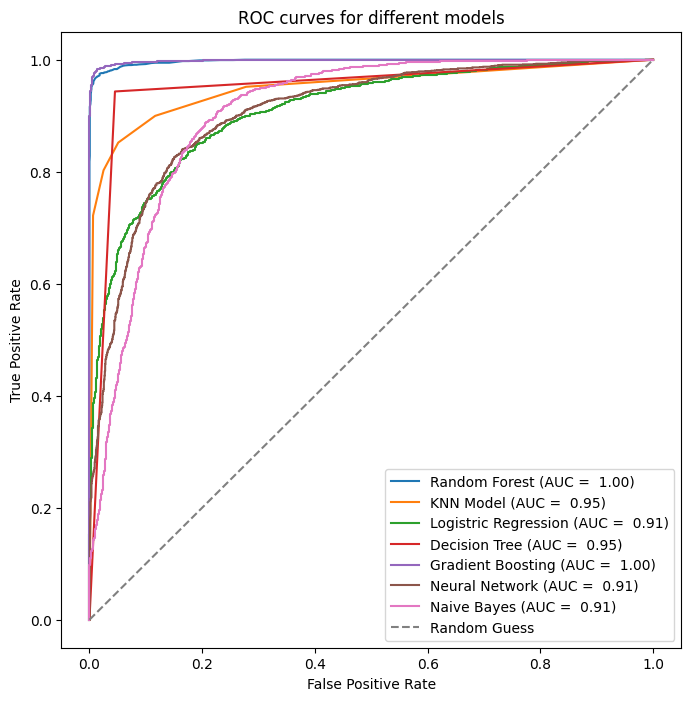

In [ ]:
# visual ROC_
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models.pop('Support Vector Classifier', None)

# calculate predicted probabilities for each model
y_probs = {}
for name, model in models.items():
    y_probs[name] = model.predict_proba(X_test)[:,1]
print

#plotting:
plt.figure(figsize=(8,8))
for name, probs in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr, label=f'{name} (AUC = {roc_auc: .2F})')

plt.plot([0,1], [0,1], linestyle='--', color='gray',label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for different models')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# visual ROC_
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# calculate predicted probabilities for each model
y_probs = gmb_model_smote.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr,tpr)

#plotting:
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='blue',lw=2, label=f'GB Model(AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for GB models')
plt.legend(loc='upper left')
plt.show()

##### visualization for choosing the models

Conclusion: 
Gradient Boosting has the highest ROC_AUC score. Still is the best model for this case.

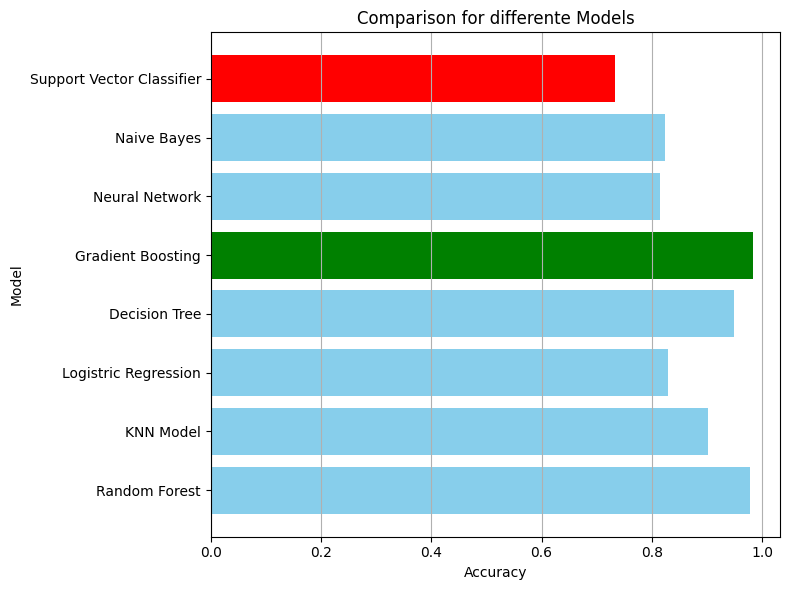

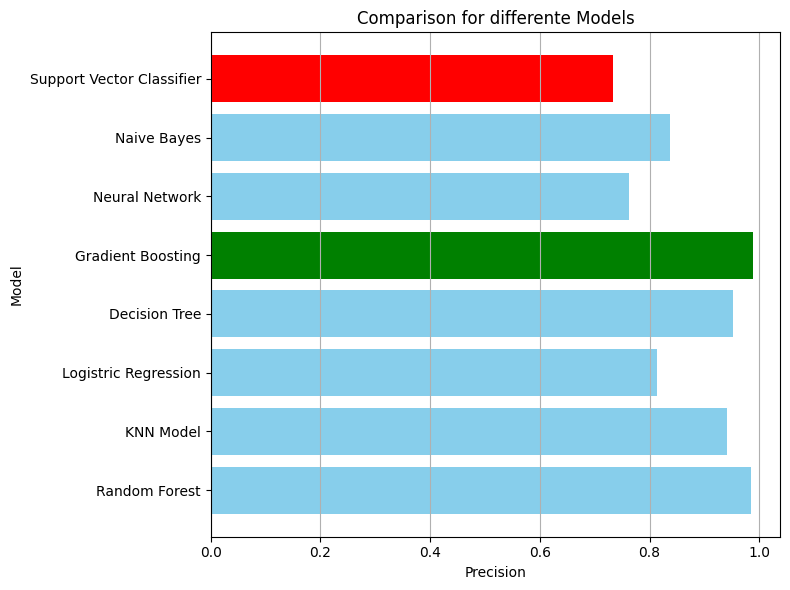

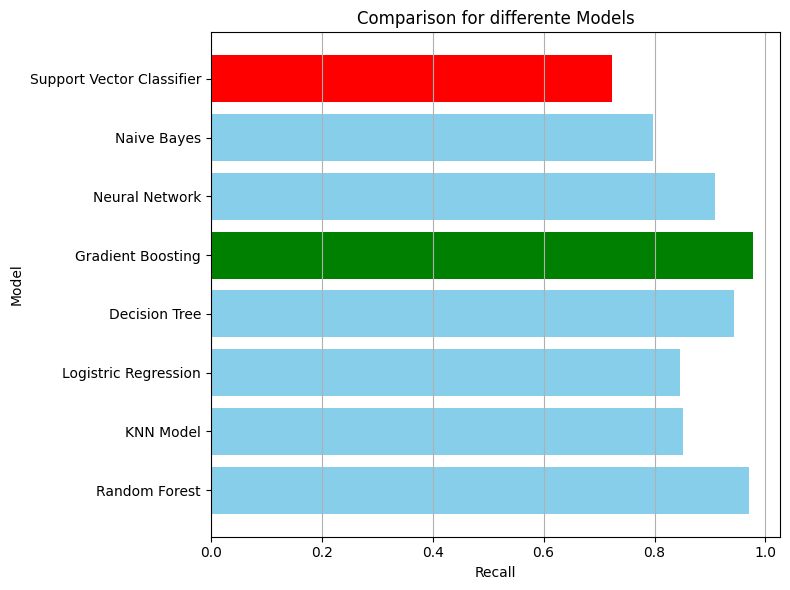

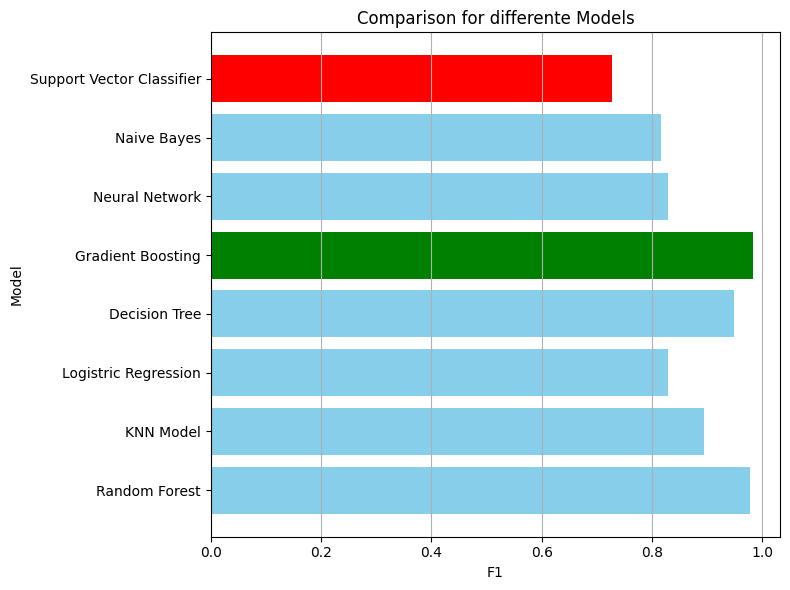

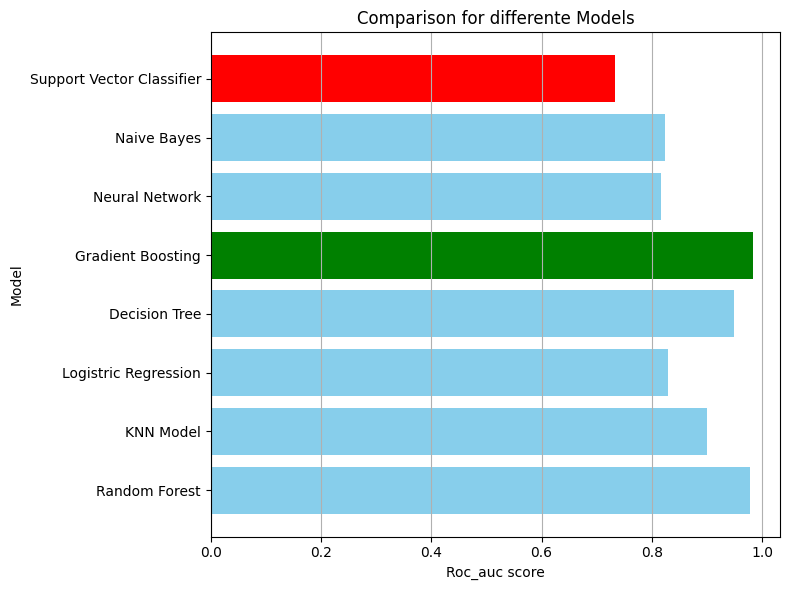

In [ ]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'ROC_AUC score']

for metric in metrics:
    scores = [results[model][metric] for model in results]
    models_list = list(results.keys())

    #coloring bars (highest value red, lowest green)
    highest_index = scores.index(max(scores))
    lowest_index = scores.index(min(scores))

    colors = ['green' if i == highest_index else 'red' if i == lowest_index else 'skyblue' for i in range(len(scores))]

    plt.figure(figsize=(8,6))
    plt.barh( models_list,scores, color=colors)

    plt.xlabel(metric.capitalize())
    plt.ylabel('Model')
    plt.title(f"Comparison for differente Models")
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()


results ROC-AUC:

ROC_AUC score may change the previous conclusion, it provides a messure on how well a model is able to distiguish positive and negative classes across various thresholds



# Making a prediction

In [18]:
#into file (train/)test_models
import joblib
import sys
sys.path.append('../GradientBoostingModel')

from train import PreprocessingData
#from ..GradientBoostingModel.train import PreprocessingData


#training model: Gradient Boosting model
#gmb_model

#saving the model
joblib.dump(gmb_model_smote, 'gradient_boosting_model.pkl')


#new file: prediction.py
#loading model:
gmb_model = joblib.load('gradient_boosting_model.pkl')

#loading data using for prediction.
data_to_predict = pd.read_csv('../data/BankChurners.csv')

#preprocessing data:
prep_data = PreprocessingData(data_to_predict)
prep_data.drop_columns()
prep_data.handle_categorical_values()

#determine X to predict (drop column Attrition_Flag)
X_to_predict = prep_data.data.drop(columns=['Attrition_Flag'])

#make prediction:
prediction = gmb_model.predict(X_to_predict)

#print(prediction)
print(prediction)


[1 1 1 ... 0 0 0]


# Analysing influence for each parameter

CONCLUSION:
As you can see in both graphics (feature importance and Premutation Importance):
most influancable features are: Total_Trans_Ct, Total_Relationship_Count, Total_Revolving_bal, 

## Feature Importance vs Permutation Importance

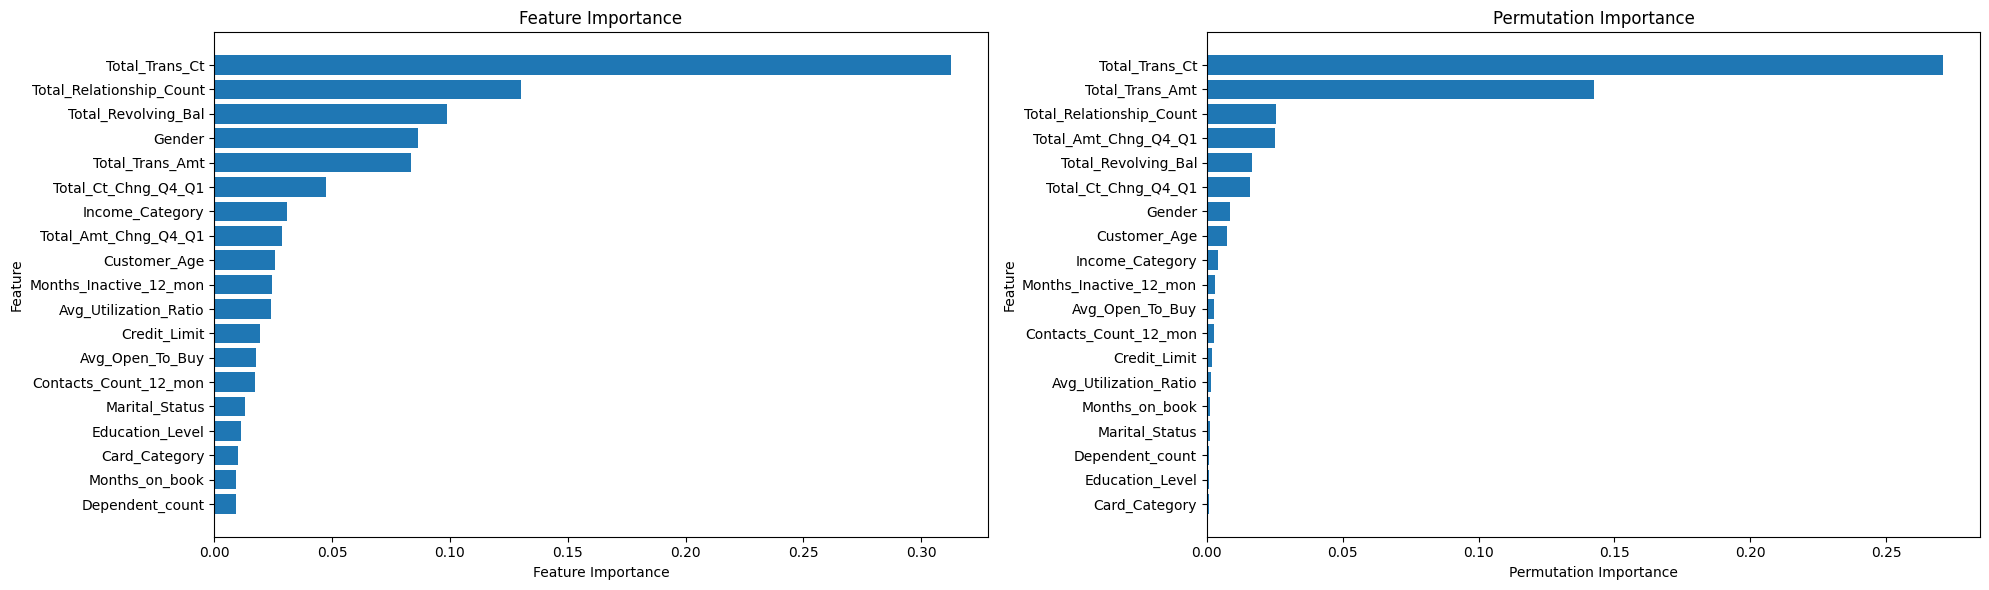

In [80]:
import numpy as np
from sklearn.inspection import permutation_importance

#data for feature importance
feature_importance = gmb_model_smote.feature_importances_
    #sorting features
sorted_ind = np.argsort(feature_importance)

sorted_features_importance = feature_importance[sorted_ind]
sorted_features = X.columns[sorted_ind]



#data for Permutation Importance:
    #calulate the importance:
perm_import = permutation_importance(gmb_model_smote, X_test, y_test, n_repeats=10, random_state=42)

    #ploting results:
sorted_index = perm_import.importances_mean.argsort()


#creatin plot to compaire:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))


#plot features importance:
axes[0].barh(sorted_features, sorted_features_importance)
axes[0].set_xlabel('Feature Importance')
axes[0].set_ylabel('Feature')
axes[0].set_title('Feature Importance')

#plot permutation importance
axes[1].barh(X.columns[sorted_index], perm_import.importances_mean[sorted_index])
axes[1].set_xlabel('Permutation Importance')
axes[1].set_ylabel('Feature')
axes[1].set_title('Permutation Importance')

plt.tight_layout()
plt.show()

## 1. Feature Importance

build-in feature for XGBClassifier

In [79]:
import numpy as np

feature_importance = gmb_model_smote.feature_importances_

#sorting features
sorted_ind = np.argsort(feature_importance)

sorted_features_importance = feature_importance[sorted_ind]
sorted_features = X.columns[sorted_ind]

#plot the features:
plt.figure(figsize=(10,6))
plt.barh(sorted_features, sorted_features_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


## 2. Permutation Importance

technique that shuffles the values of each feature one by one and measures how much the performance metric decreases. The higher the decrease, the more important the feature.

In [66]:
from sklearn.inspection import permutation_importance

#calulate the importance:
perm_import = permutation_importance(gmb_model_smote, X_test, y_test, n_repeats=10, random_state=42)

#ploting results:
sorted_index = perm_import.importances_mean.argsort()
plt.figure(figsize=(10,6))
plt.barh(X.columns[sorted_index], perm_import.importances_mean[sorted_index])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance')
plt.show()


## 3. Partial Dependence Plot

show relationsip between feature and predicted outcome while keeping other features constant.

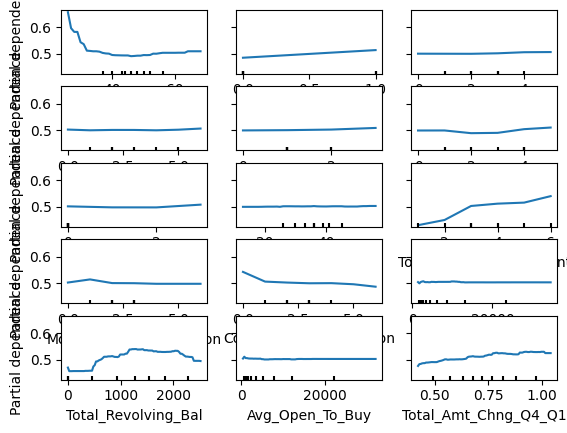

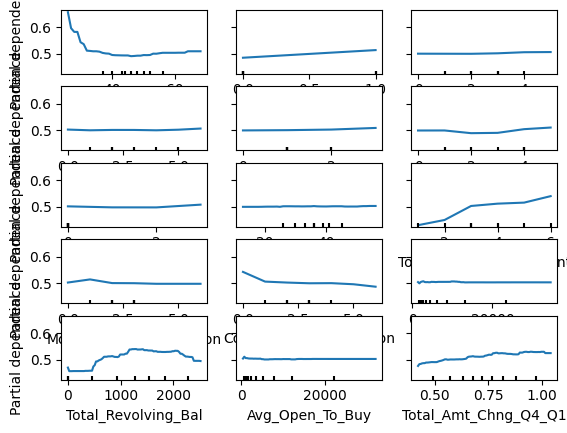

In [76]:
from sklearn.inspection import PartialDependenceDisplay

#ploting to visualize:
features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]  
PartialDependenceDisplay.from_estimator(gmb_model_smote, X_train, features, target=0)  #for class 0
plt.show()
PartialDependenceDisplay.from_estimator(gmb_model_smote, X_train, features, target=1)  #for class 1
plt.show()

## CONCLUSION:



# Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, prediction)

#plotting:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Prediction labels')
plt.ylabel('True lables')
plt.title('Confusion Matrix')

plt.show()



ValueError: Found input variables with inconsistent numbers of samples: [3400, 10127]